<a href="https://colab.research.google.com/github/shiissaa/MAT421/blob/main/ModuleG(part2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**21.4 Simpson's Rule**

Simpson's Rule is used when we need to approximate the area under f(x) over two consecutive subintervals. This is done by fitting a quadratic polynomial through the points that form a unique polynomial, and then integrating the quadratic exactly. With Simpson's rule, there must be an even number of intervals (and thus, an odd number of gridpoints). We can use Simpson's rule to approximate an interval with an odd amount of evenly spaced grid points over the whole interval.

In [10]:
import numpy as np

a = 0
b = np.pi
n = 9
h = (b-a) / (n-1)
x = np.linspace(a, b, n)
fx = np.sin(x)

I_simp = (h/3) * (fx[0] + 2*sum(fx[:n-2:2]) \
                  + 4*sum(fx[1:n-1:2]) + fx[n-1])
err_simp = 2 - I_simp

print(I_simp)
print(err_simp)

2.0002691699483877
-0.00026916994838765973


**21.5 Computing Integrals in Python**

$scipy.integrate$ allows us to use several functions for the purpose of computing integrals. The $trapz$ takes as input arguments an array of function values $f$ computed on a numerical grid $x$. This can be used to approximate an integral using the trapezoid rule.



In [7]:
import numpy as np
from scipy.integrate import trapz

a = 0
b = np.pi
n = 11
h = (b-a) / (n-1)
x = np.linspace(a,b,n)
fx = np.sin(x)

I_trapz = trapz(fx, x)
I_trap = (h/2)*(fx[0] + 2*sum(fx[1:n-1]) + fx[n-1])

print(I_trapz)
print(I_trap)

1.9835235375094544
1.9835235375094546


We may also want to know the approximated cumulative interval, which is where $cumtrapz$ and $cumsum$ come into play. They work similarly to $trapz$, but are better for approximating a cumulative integral.

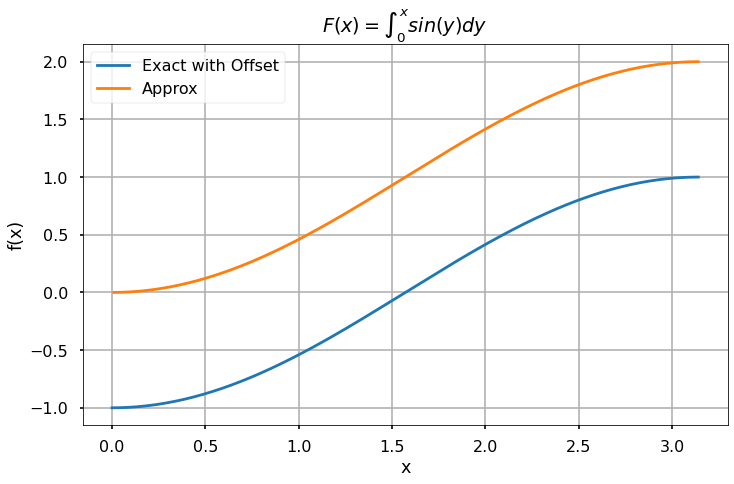

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz
%matplotlib inline
plt.style.use('seaborn-poster')

x = np.arange(0, np.pi, 0.01)
F_exact = -np.cos(x)
F_approx = cumtrapz(np.sin(x), x)

plt.figure(figsize = (10,6))
plt.plot(x, F_exact)
plt.plot(x[1::], F_approx)
plt.grid()
plt.tight_layout()
plt.title('$F(x) = \int_0^{x} sin(y) dy$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['Exact with Offset', 'Approx'])
plt.show()

$quad(f, a, b)$ is another way of performing numerical differentiation. It integrates the function defined by the function object $f$, from $a$ to $b$.

In [4]:
import numpy as np
from scipy.integrate import quad

I_quad, est_err_quad = \
          quad(np.sin, 0, np.pi)
err_quad = 2 - I_quad
print(I_quad)
print(est_err_quad, err_quad)

2.0
2.220446049250313e-14 0.0
